In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib notebook

In [2]:
dt = np.dtype(np.int32).newbyteorder(">")

def get_max(d):
    """
    Max val
    """
    return np.max(d[1:])

def read_dat(id_num, module):
    """
    id
    module : fem or pam
    """
    data = {}
    norm_data = {}  # peak normalized
    for pol in ["north", "east"]:
        path = f"data/{module}/{module}{id_num}_{pol}.npz"
        d = np.frombuffer(np.load(path)["3"], dtype=dt).astype(float)
        norm_d = d / get_max(d)
        data[pol] = d
        norm_data[pol] = norm_d
    
    return data, norm_data

def all_data(id_nums, module):
    data = {}
    norm_data = {}
    for id_num in id_nums:
        d, nd = read_dat(id_num, module)
        data[id_num] = d
        norm_data[id_num] = nd
    return data, norm_data

In [3]:
def plot_data(data, id_nums):
    plt.figure()
    for id_num in id_nums:
        d = data[id_num]
        for pol in ["north", "east"]:
            plt.plot(d[pol], label=f"{id_num}: {pol}")
    plt.legend()
    plt.show()
    
def plot_norm(data, id_nums, ref_max):
    """
    data : dict, peak normalized data
    id_nums : list of str
    ref_max : float, value to set peak to
    """
    plt.figure()
    for id_num in id_nums:
        d = data[id_num]
        for pol in ["north", "east"]:
            plt.plot(d[pol] * ref_max, label=f"{id_num}: {pol}")
    plt.legend()
    #plt.ylim(0, 1e6)
    plt.show()
    
def plot_ratio(data, id_nums, ref_id, ref_pol="east"):
    """
    Ratio between all the signals and a reference signal. The reference signal is specfied by
    ``ref_id'' and ``ref_pol''.
    
    data : dict, peak normalized data
    id_nums : list of str
    ref_id : the id to normalize by
    ref_pol : the pol to normalize by
    """
    ref_signal = data[ref_id][ref_pol]
    plt.figure()
    for id_num in id_nums:
        d = data[id_num]
        for pol in ["north", "east"]:
            plt.plot(d[pol] / ref_signal, label=f"{id_num}: {pol}")
    plt.legend()
    #plt.ylim(0, 1e6)
    plt.show()
    
def plot_noise(data, id_nums):
    plt.figure()
    for id_num in id_nums:
        d = data[id_num]
        for pol in ["north", "east"]:
            plt.plot(np.diff(d[pol]) / d[pol][1:], label=f"{id_num}: {pol}")
    plt.legend(bbox_to_anchor=[1., 1.])
    plt.ylim(-0.5, 0.5)
    plt.show()

## FEMs
Fiber: 500m, A

PAM: 378, EAST input, attenuation: east = 9, north = 4

SNAP: C000091, E6 input

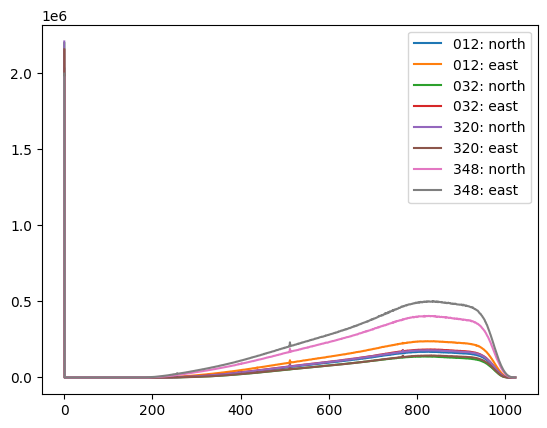

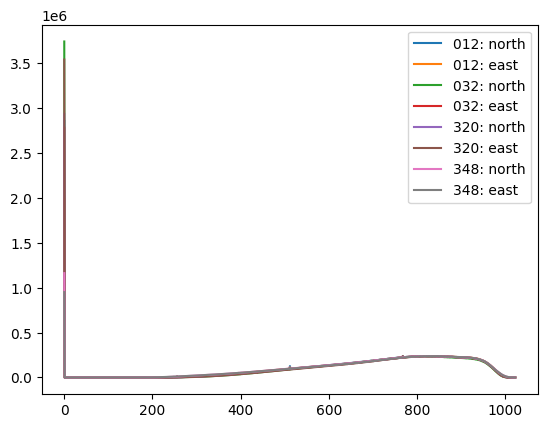

/tmp/ipykernel_43524/3693961440.py:40: RuntimeWarning: invalid value encountered in divide
  plt.plot(d[pol] / ref_signal, label=f"{id_num}: {pol}")
/tmp/ipykernel_43524/3693961440.py:40: RuntimeWarning: divide by zero encountered in divide
  plt.plot(d[pol] / ref_signal, label=f"{id_num}: {pol}")


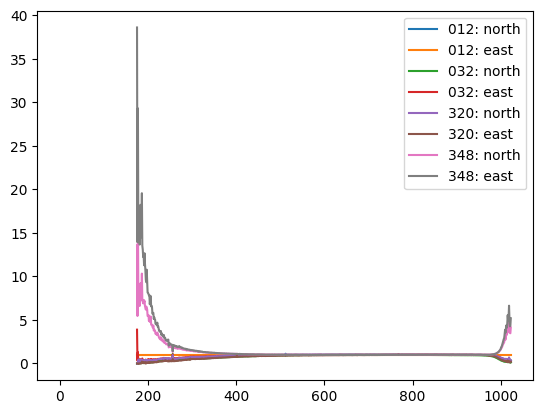

/tmp/ipykernel_43524/3693961440.py:50: RuntimeWarning: divide by zero encountered in divide
  plt.plot(np.diff(d[pol]) / d[pol][1:], label=f"{id_num}: {pol}")
/tmp/ipykernel_43524/3693961440.py:50: RuntimeWarning: invalid value encountered in divide
  plt.plot(np.diff(d[pol]) / d[pol][1:], label=f"{id_num}: {pol}")


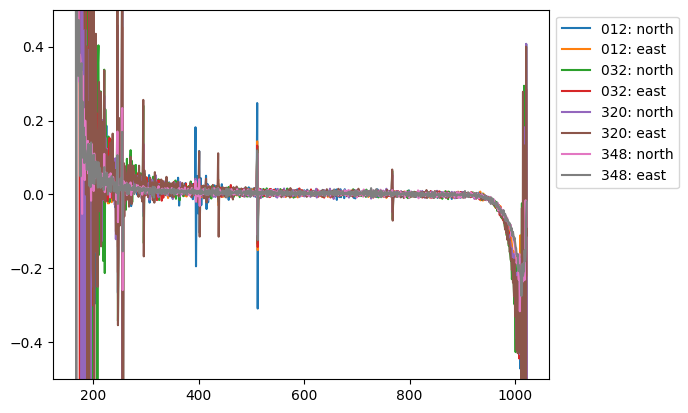

In [4]:
FEMS = ["012", "032", "320", "348"]
fem_data, fem_norm = all_data(FEMS, "fem")

plot_data(fem_data, FEMS)
plot_norm(fem_norm, FEMS, get_max(fem_data["012"]["east"]))
plot_ratio(fem_norm, FEMS, "012", ref_pol="east")
plot_noise(fem_data, FEMS)

## PAMs

Fiber: 500m, A

FEM: 032, EAST input

PAM attenuation: east = 8, north = 8

SNAP: C000091, E6 input

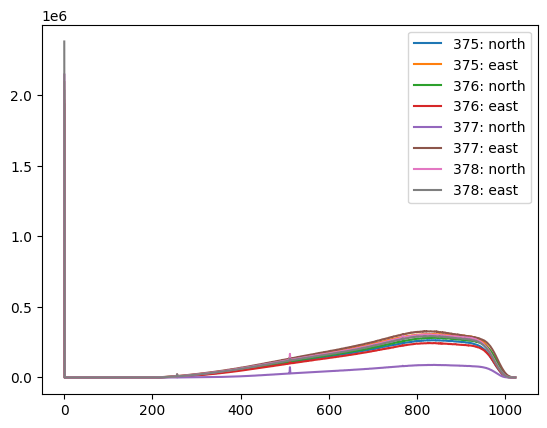

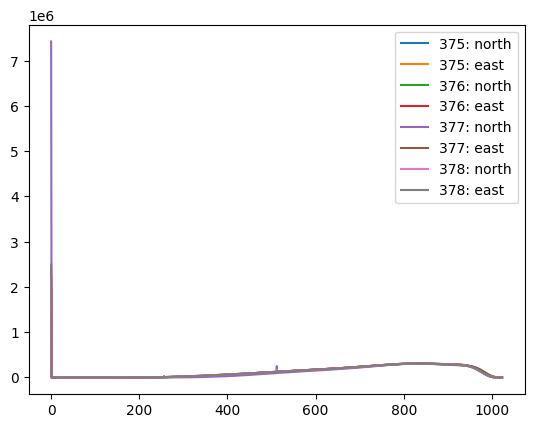

/tmp/ipykernel_43524/3693961440.py:40: RuntimeWarning: invalid value encountered in divide
  plt.plot(d[pol] / ref_signal, label=f"{id_num}: {pol}")
/tmp/ipykernel_43524/3693961440.py:40: RuntimeWarning: divide by zero encountered in divide
  plt.plot(d[pol] / ref_signal, label=f"{id_num}: {pol}")


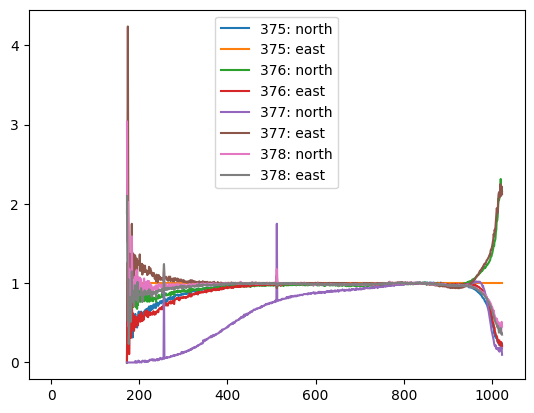

/tmp/ipykernel_43524/3693961440.py:50: RuntimeWarning: divide by zero encountered in divide
  plt.plot(np.diff(d[pol]) / d[pol][1:], label=f"{id_num}: {pol}")
/tmp/ipykernel_43524/3693961440.py:50: RuntimeWarning: invalid value encountered in divide
  plt.plot(np.diff(d[pol]) / d[pol][1:], label=f"{id_num}: {pol}")


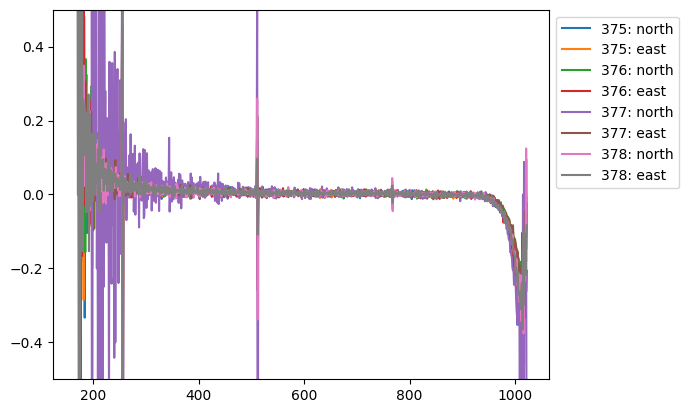

In [5]:
PAMS = ["375", "376", "377", "378"]
pam_data, pam_norm = all_data(PAMS, "pam")

plot_data(pam_data, PAMS)
plot_norm(pam_norm, PAMS, get_max(pam_data["375"]["east"]))
plot_ratio(pam_norm, PAMS, "375", ref_pol="east")
plot_noise(pam_data, PAMS)

## Fiber 

#### NOTE: fibers are labeled by A and B, we label them here EAST and NORTH. a = east, b = north. Fiber 5 is the short back-up fiber.

FEM: 032, EAST input

PAM 375, EAST input, attenuation = 8

SNAP: C000091, E6 input

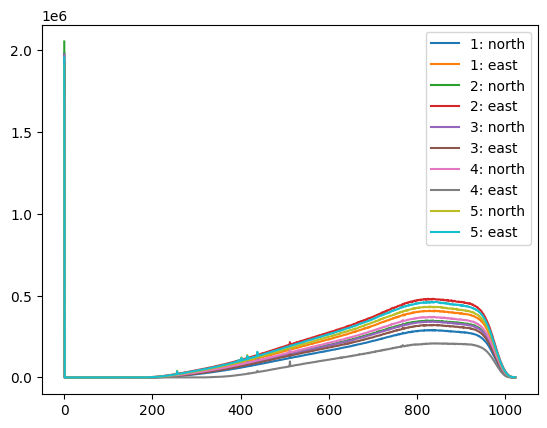

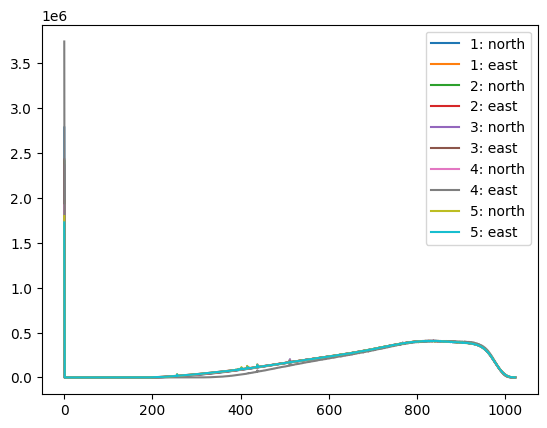

/tmp/ipykernel_43524/3693961440.py:40: RuntimeWarning: invalid value encountered in divide
  plt.plot(d[pol] / ref_signal, label=f"{id_num}: {pol}")
/tmp/ipykernel_43524/3693961440.py:40: RuntimeWarning: divide by zero encountered in divide
  plt.plot(d[pol] / ref_signal, label=f"{id_num}: {pol}")


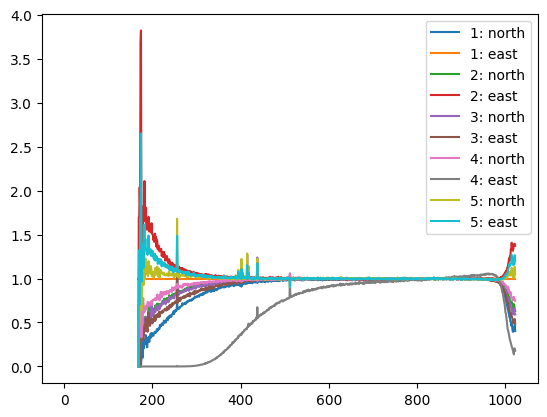

/tmp/ipykernel_43524/3693961440.py:50: RuntimeWarning: divide by zero encountered in divide
  plt.plot(np.diff(d[pol]) / d[pol][1:], label=f"{id_num}: {pol}")
/tmp/ipykernel_43524/3693961440.py:50: RuntimeWarning: invalid value encountered in divide
  plt.plot(np.diff(d[pol]) / d[pol][1:], label=f"{id_num}: {pol}")


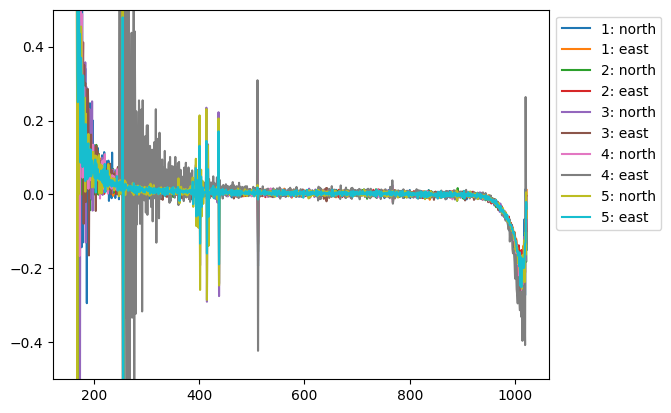

In [6]:
FIBERS = ["1", "2", "3", "4", "5"]
fiber_data, fiber_norm = all_data(FIBERS, "fiber")

plot_data(fiber_data, FIBERS)
plot_norm(fiber_norm, FIBERS, get_max(fiber_data["1"]["east"]))
plot_ratio(fiber_norm, FIBERS, "1", ref_pol="east")
plot_noise(fiber_data, FIBERS)

## SNAP  C000091


FEM: 032, EAST input

PAM 375, EAST input, attenuation = 8

Fiber 4A

Finger-tight

In [4]:
# mapping from SNAP inputs to the numbers we store the data with
snap_inputs = {"N0": "0", "N4": "2", "N8": "4", "E2": "1", "E6": "3", "E10": "5"}

def read_SNAP_dat(id_num):
    """
    id
    """
    data = {}
    norm_data = {}  # peak normalized
    for inp in snap_inputs:
        path = f"data/snap/{id_num}/{inp}.npz"
        d = np.frombuffer(np.load(path)[snap_inputs[inp]], dtype=dt).astype(float)
        norm_d = d / get_max(d)
        data[inp] = d
        norm_data[inp] = norm_d
    
    return data, norm_data

def plot_SNAP_data(data, log=False):
    plt.figure()
    for inp in data:
        d = data[inp]
        plt.plot(d, label=f"{inp}")
    plt.legend()
    if log:
        plt.yscale("log")
    plt.show()
    
def plot_SNAP_norm(data, ref_max, log=False):
    """
    data : dict, peak normalized data
    ref_max : float, value to set peak to
    """
    plt.figure()
    for inp in data:
        d = data[inp]
        plt.plot(d * ref_max, label=f"{inp}")
    plt.legend()
    if log:
        plt.yscale("log")
    plt.show()
    
def plot_SNAP_ratio(data, ref_inp="N0", log=False):
    """
    Ratio between all the signals and a reference signal. The reference signal is specfied by
    ``ref_inp''.
    
    data : dict, peak normalized data
    ref_inp : the input signal to normalize by
    """
    ref_signal = data[ref_inp]
    plt.figure()
    for inp in data:
        d = data[inp]
        plt.plot(d / ref_signal, label=f"{inp}")
    plt.legend()
    if log:
        plt.yscale("log")
    plt.show()
    
def plot_SNAP_noise(data):
    plt.figure()
    for inp in data:
        d = data[inp]
        plt.plot(np.diff(d) / d[1:], label=f"{inp}")
    plt.legend()
    plt.ylim(-0.5, 0.5)
    plt.show()

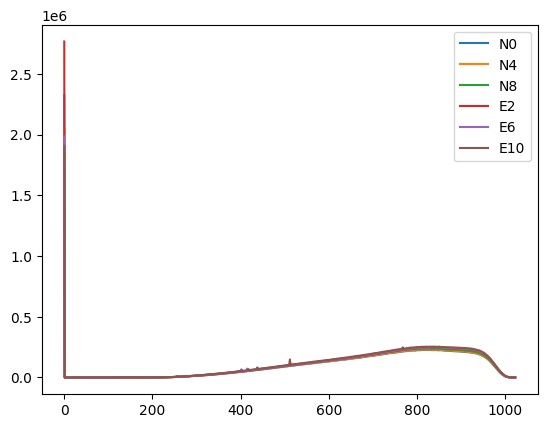

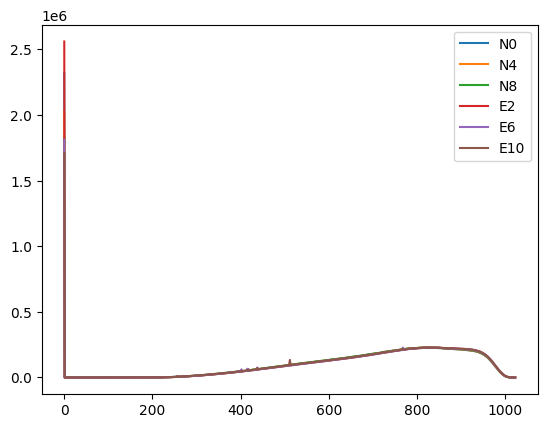

/tmp/ipykernel_43524/1317779827.py:55: RuntimeWarning: invalid value encountered in divide
  plt.plot(d / ref_signal, label=f"{inp}")
/tmp/ipykernel_43524/1317779827.py:55: RuntimeWarning: divide by zero encountered in divide
  plt.plot(d / ref_signal, label=f"{inp}")


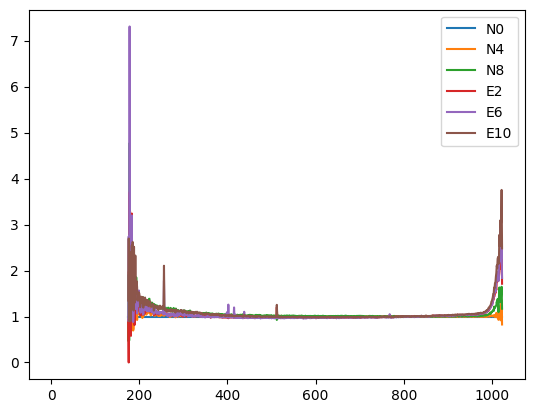

/tmp/ipykernel_43524/1317779827.py:65: RuntimeWarning: divide by zero encountered in divide
  plt.plot(np.diff(d) / d[1:], label=f"{inp}")
/tmp/ipykernel_43524/1317779827.py:65: RuntimeWarning: invalid value encountered in divide
  plt.plot(np.diff(d) / d[1:], label=f"{inp}")


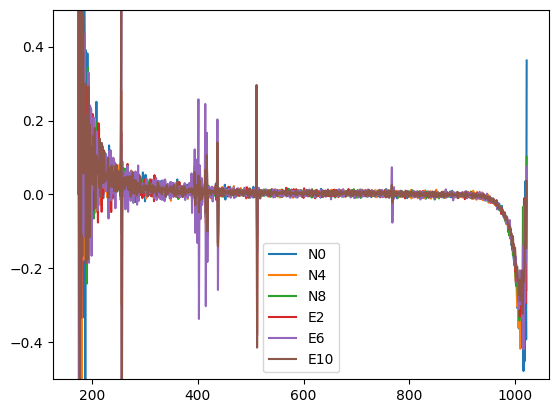

In [13]:
snap_c91_data, snap_c91_norm = read_SNAP_dat("C000091")

plot_SNAP_data(snap_c91_data)
plot_SNAP_norm(snap_c91_norm, get_max(snap_c91_data["N0"]))
plot_SNAP_ratio(snap_c91_norm, ref_inp="N0")
plot_SNAP_noise(snap_c91_data)

## PAM buck converter

Using 12V-6V buck converter instead of powering with 6V from lab power supply.

Fiber: 4B

FEM: 032, EAST input

PAM 375, attenuation: east = 8, north = 8

SNAP: C000091, E6 input

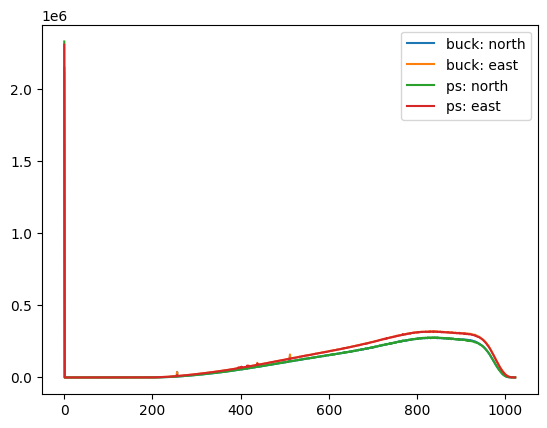

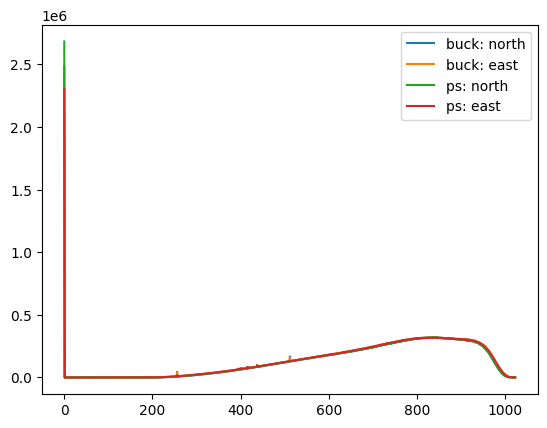

/tmp/ipykernel_43524/3693961440.py:40: RuntimeWarning: divide by zero encountered in divide
  plt.plot(d[pol] / ref_signal, label=f"{id_num}: {pol}")
/tmp/ipykernel_43524/3693961440.py:40: RuntimeWarning: invalid value encountered in divide
  plt.plot(d[pol] / ref_signal, label=f"{id_num}: {pol}")


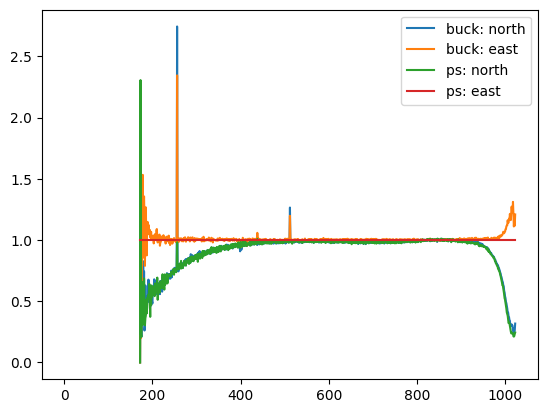

/tmp/ipykernel_43524/3693961440.py:50: RuntimeWarning: divide by zero encountered in divide
  plt.plot(np.diff(d[pol]) / d[pol][1:], label=f"{id_num}: {pol}")
/tmp/ipykernel_43524/3693961440.py:50: RuntimeWarning: invalid value encountered in divide
  plt.plot(np.diff(d[pol]) / d[pol][1:], label=f"{id_num}: {pol}")


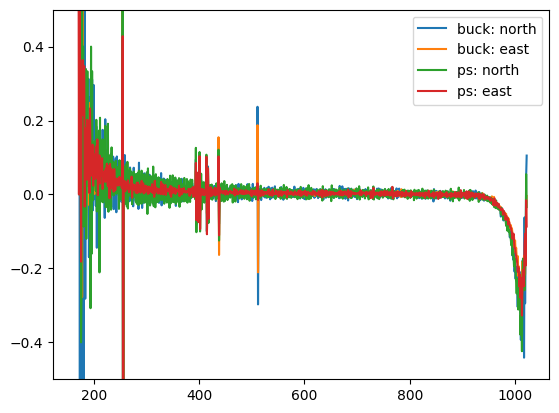

In [9]:
POWER = ["buck", "ps"]
buck_data, buck_norm = all_data(POWER, "power")

plot_data(buck_data, POWER)
plot_norm(buck_norm, POWER, get_max(buck_data["ps"]["east"]))
plot_ratio(buck_norm, POWER, "ps", ref_pol="east")
plot_noise(buck_data, POWER)

## Connect an antenna and compare spectra for power supply directly and buck converter

SNAP: C000091

Fiber 4B

PAM 375: east, attenuation 0 and 15 (see filename)

FEM 032: east

SNAP input : E6

Small telescope antenna, fully unextended (compressed?)

<IPython.core.display.Javascript object>


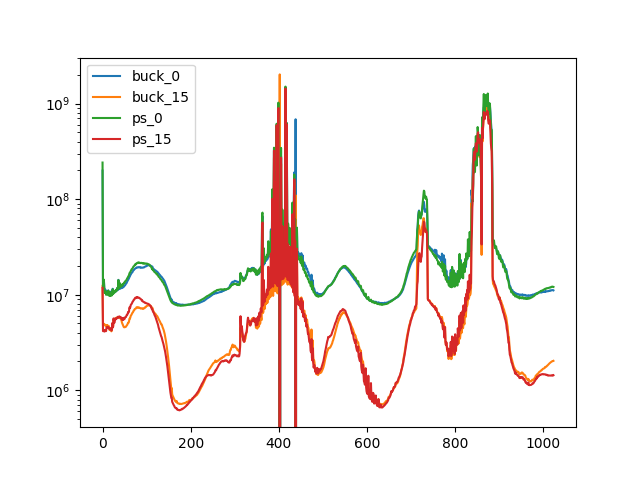

<IPython.core.display.Javascript object>


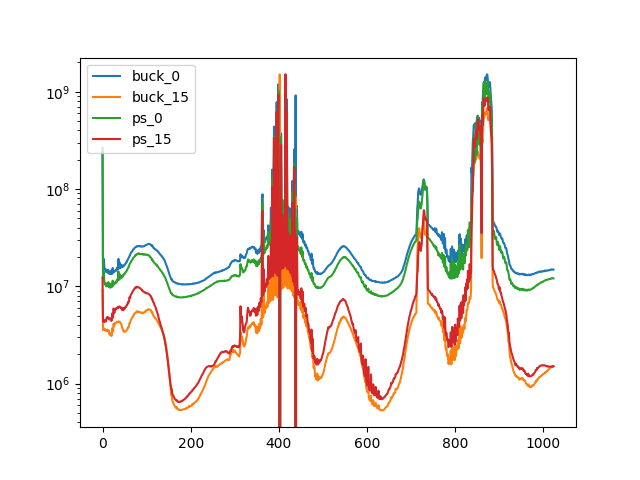

<IPython.core.display.Javascript object>


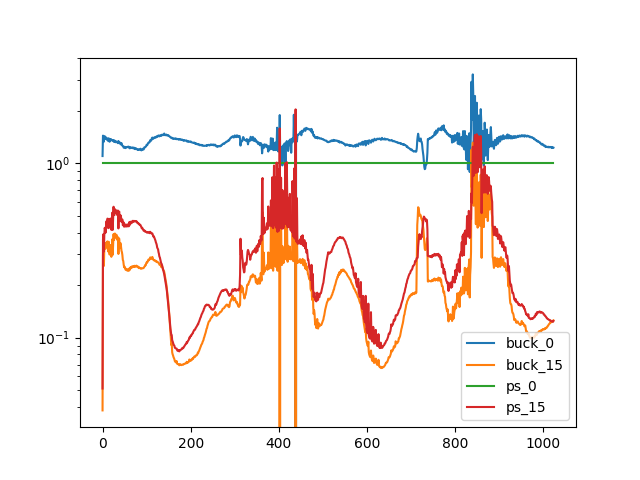

<IPython.core.display.Javascript object>


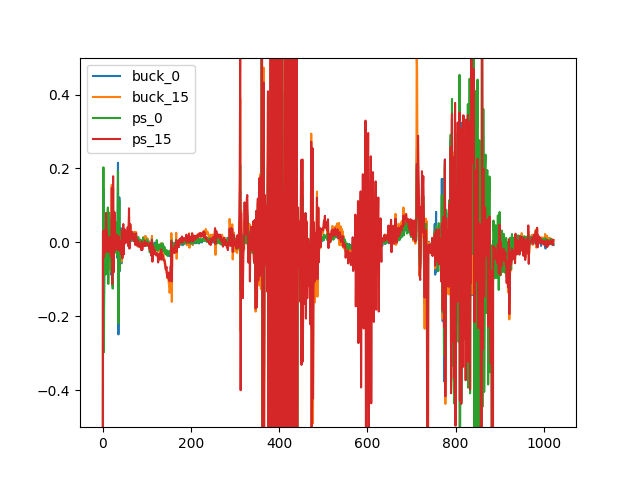

In [5]:
buck_ant_data = {}
norm_ant_data = {}
for name in ["buck_0", "buck_15", "ps_0", "ps_15"]:
    path = f"data/power/antenna/{name}.npz"
    d = np.frombuffer(np.load(path)["3"], dtype=dt).astype(float)
    norm_d = d / get_max(d)
    buck_ant_data[name] = d
    norm_ant_data[name] = norm_d

plot_SNAP_data(buck_ant_data, log=True)
plot_SNAP_norm(norm_ant_data, get_max(buck_ant_data["ps_0"]), log=True)
plot_SNAP_ratio(norm_ant_data, ref_inp="ps_0", log=True)
plot_SNAP_noise(buck_ant_data)